<a href="https://colab.research.google.com/github/AbhigyanSen/Face-Mask-Detection/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


### **Importing Dataset**

In [1]:
# Configuring to Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Fetching Data from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:06<00:00, 37.7MB/s]
100% 163M/163M [00:06<00:00, 27.6MB/s]


In [4]:
# Extracting Datset from Zip File
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The Dataset was Extracted')

The Dataset was Extracted


In [10]:
WithMaskFiles = os.listdir('/content/data/with_mask')
print(WithMaskFiles[:5])
print(WithMaskFiles[-5:])

['with_mask_3089.jpg', 'with_mask_897.jpg', 'with_mask_1491.jpg', 'with_mask_1213.jpg', 'with_mask_3425.jpg']
['with_mask_2587.jpg', 'with_mask_1014.jpg', 'with_mask_256.jpg', 'with_mask_1581.jpg', 'with_mask_3540.jpg']


In [8]:
WithoutMaskFiles = os.listdir('/content/data/without_mask')
print(WithoutMaskFiles[:5])
print(WithoutMaskFiles[-5:])

['without_mask_678.jpg', 'without_mask_1832.jpg', 'without_mask_834.jpg', 'without_mask_1795.jpg', 'without_mask_1500.jpg']
['without_mask_3389.jpg', 'without_mask_2668.jpg', 'without_mask_3235.jpg', 'without_mask_3645.jpg', 'without_mask_1896.jpg']


In [11]:
print("Number of Images with Mask: ", len(WithMaskFiles))
print("Number of Images without Mask: ", len(WithoutMaskFiles))

Number of Images with Mask:  3725
Number of Images without Mask:  3828


###### Labelling Images
 ###### 0: Without Mask
 ###### 1: With Mask

In [13]:
WithMaskLabels = [1]*3725
WithoutMaskLabels = [0]*3828

print(WithMaskLabels[:5])
print(WithoutMaskLabels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
Labels = WithMaskLabels + WithoutMaskLabels

print(len(Labels))
print(Labels[:5])
print(Labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


#### **Data Visualization**

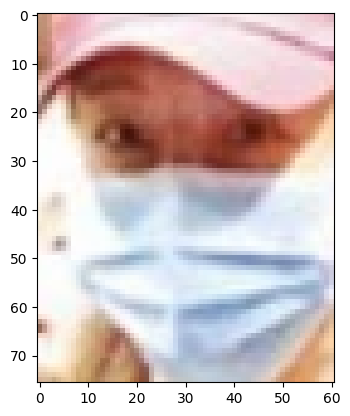

In [16]:
# Displaying Images with Masks
WithMaskImg = mpimg.imread('/content/data/with_mask/with_mask_1213.jpg')
imgplot = plt.imshow(WithMaskImg)
plt.show()

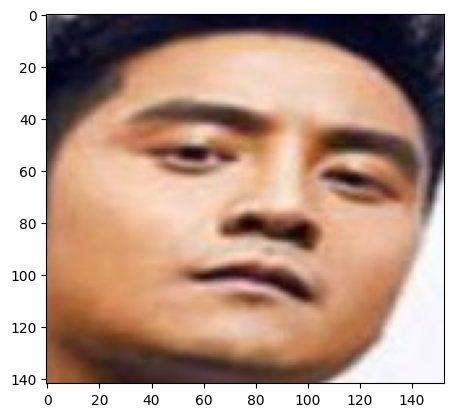

In [17]:
# Displaying Images without Masks
WithoutMaskImg = mpimg.imread('/content/data/without_mask/without_mask_3235.jpg')
imgplot = plt.imshow(WithoutMaskImg)
plt.show()

#### **Image Processing**
##### As we can see that the images in the dataset are not having uniform sizes, hence, resizing thm and converting into numoy arrays

In [20]:
Data = []

WithMaskPath = '/content/data/with_mask/'
for ImgFile in WithMaskFiles:
  image = Image.open(WithMaskPath + ImgFile)
  image = image.resize((128, 128))
  # Some images oin the Dataset are in GrayScale, hence converting them into RGB
  image = image.convert('RGB')
  image = np.array(image)
  Data.append(image)


WithoutMaskPath = '/content/data/without_mask/'
for ImgFile in WithoutMaskFiles:
  image = Image.open(WithoutMaskPath + ImgFile)
  image = image.resize((128, 128))
  # Some images oin the Dataset are in GrayScale, hence converting them into RGB
  image = image.convert('RGB')
  image = np.array(image)
  Data.append(image)

In [22]:
print("Data: " ,len(Data))

Data:  7553


In [23]:
Data[0]

array([[[ 45,  67,  62],
        [  3,  25,   9],
        [ 15,  40,  11],
        ...,
        [ 70,  95,  27],
        [ 74, 102,  32],
        [ 38,  69,  14]],

       [[ 44,  64,  53],
        [  0,  20,   2],
        [ 13,  39,   8],
        ...,
        [115, 140,  65],
        [133, 162,  83],
        [119, 152,  68]],

       [[ 90, 116,  99],
        [  8,  32,  10],
        [  6,  27,   3],
        ...,
        [106, 133,  55],
        [125, 155,  70],
        [124, 159,  68]],

       ...,

       [[106,  88,  74],
        [ 99,  84,  62],
        [107,  96,  70],
        ...,
        [205, 162, 135],
        [170, 134, 116],
        [122,  89,  78]],

       [[108,  89,  75],
        [ 99,  85,  62],
        [104,  93,  68],
        ...,
        [208, 165, 139],
        [181, 145, 127],
        [134, 101,  90]],

       [[108,  89,  75],
        [101,  86,  64],
        [103,  92,  68],
        ...,
        [210, 167, 140],
        [189, 153, 135],
        [136, 103,  93]]

###### Converting Image List and Labels List to Numpy Array

In [24]:
# Image List
X = np.array(Data)
# Label List
Y = np.array(Labels)

In [34]:
print("Type of Image List:", type(X))
print("Type of Label List:", type(Y))

print ("\n")

print("Shape of Image List:", X.shape)
print("Shape of Label List:", Y.shape)

Type of Image List: <class 'numpy.ndarray'>
Type of Label List: <class 'numpy.ndarray'>


Shape of Image List: (7553, 128, 128, 3)
Shape of Label List: (7553,)


##### **Splitting into Train Data and Test Data**

In [36]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [37]:
print("Shape of Image List: " ,X.shape)
print("Shape of Image Training List: 80% of the Total Dataset = ", xTrain.shape)
print("Shape of Image Testing   List: 20% of the Total Dataset = ", xTest.shape)

Shape of Image List:  (7553, 128, 128, 3)
Shape of Image Training List: 80% of the Total Dataset =  (6042, 128, 128, 3)
Shape of Image Testing   List: 20% of the Total Dataset =  (1511, 128, 128, 3)


##### Rescalling the Data
###### The values of the Data lies between 0 to 255, Rescalling them to lie between 0 and 1 to increase model perfomance

In [38]:
xTrainScaled = xTrain/255
xTestScaled = xTest/255

In [43]:
print("Original Image: ")
print(xTrain[0])
print("\n")
print("Rescalled Image: ")
print(xTrainScaled[0])

Original Image: 
[[[155 150 144]
  [154 149 143]
  [153 148 142]
  ...
  [ 69 116 188]
  [ 71 115 188]
  [ 71 115 188]]

 [[156 151 145]
  [156 151 145]
  [155 150 144]
  ...
  [ 70 117 189]
  [ 70 116 188]
  [ 70 116 188]]

 [[159 154 148]
  [159 154 148]
  [158 153 147]
  ...
  [ 72 119 191]
  [ 70 118 190]
  [ 70 118 190]]

 ...

 [[ 62  83 113]
  [ 60  81 110]
  [ 64  85 114]
  ...
  [ 73  96 127]
  [ 71  96 126]
  [ 71  96 126]]

 [[ 67  91 121]
  [ 63  87 116]
  [ 64  88 119]
  ...
  [ 73  96 127]
  [ 71  96 127]
  [ 71  96 126]]

 [[ 66  91 122]
  [ 67  92 123]
  [ 69  94 125]
  ...
  [ 72  97 127]
  [ 71  96 127]
  [ 70  95 126]]]


Rescalled Image: 
[[[0.60784314 0.58823529 0.56470588]
  [0.60392157 0.58431373 0.56078431]
  [0.6        0.58039216 0.55686275]
  ...
  [0.27058824 0.45490196 0.7372549 ]
  [0.27843137 0.45098039 0.7372549 ]
  [0.27843137 0.45098039 0.7372549 ]]

 [[0.61176471 0.59215686 0.56862745]
  [0.61176471 0.59215686 0.56862745]
  [0.60784314 0.58823529 0.56

#### **Building Convolution Neural Network**

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
NumberOfClasses = 2
Model = keras.Sequential()

# Adding Layers
Model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
Model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
Model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
Model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
Model.add(keras.layers.Flatten())
Model.add(keras.layers.Dense(128, activation='relu'))
Model.add(keras.layers.Dropout(0.5))
Model.add(keras.layers.Dense(64, activation='relu'))
Model.add(keras.layers.Dropout(0.5))
Model.add(keras.layers.Dense(NumberOfClasses, activation='sigmoid'))

In [46]:
# Compiling the Neural Network
Model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [47]:
# Training the Neural Network
History = Model.fit(xTrainScaled, yTrain, validation_split=0.1, epochs = 10)

Epoch 1/10
170/170 [==============================] - 18s 27ms/step - loss: 0.5562 - acc: 0.7488 - val_loss: 0.2900 - val_acc: 0.8711
Epoch 2/10
170/170 [==============================] - 3s 20ms/step - loss: 0.3222 - acc: 0.8804 - val_loss: 0.3129 - val_acc: 0.8926
Epoch 3/10
170/170 [==============================] - 3s 20ms/step - loss: 0.2771 - acc: 0.8902 - val_loss: 0.2571 - val_acc: 0.8926
Epoch 4/10
170/170 [==============================] - 4s 22ms/step - loss: 0.2450 - acc: 0.9036 - val_loss: 0.2123 - val_acc: 0.9091
Epoch 5/10
170/170 [==============================] - 4s 21ms/step - loss: 0.2087 - acc: 0.9145 - val_loss: 0.2005 - val_acc: 0.9240
Epoch 6/10
170/170 [==============================] - 3s 20ms/step - loss: 0.1857 - acc: 0.9266 - val_loss: 0.1842 - val_acc: 0.9339
Epoch 7/10
170/170 [==============================] - 3s 20ms/step - loss: 0.1646 - acc: 0.9345 - val_loss: 0.1720 - val_acc: 0.9322
Epoch 8/10
170/170 [==============================] - 4s 22ms/step -

#### **Model Evaluation**

In [48]:
Loss, Accuracy = Model.evaluate(xTestScaled, yTest)
print("Test Accuracy: ", Accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2596 - acc: 0.9246
Test Accuracy:  0.9245532751083374


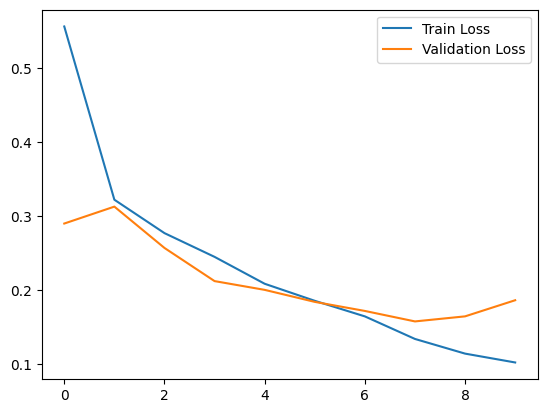

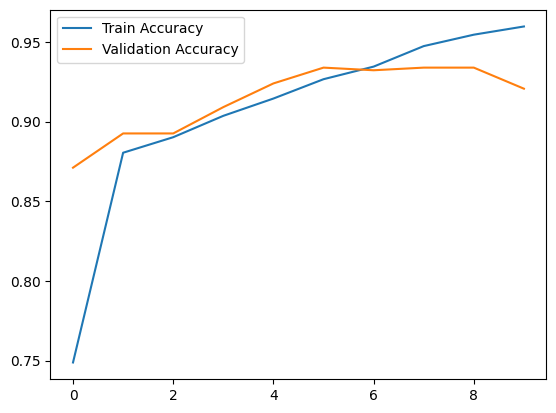

In [50]:
# Plotting Loss Value
plt.plot(History.history['loss'], label = 'Train Loss')
plt.plot(History.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

# Plotting Accuracy Value
plt.plot(History.history['acc'], label = 'Train Accuracy')
plt.plot(History.history['val_acc'], label = 'Validation Accuracy')
plt.legend()
plt.show()

#### **Prediction System**

Path of Image to be Predicted: /content/test2.jpg


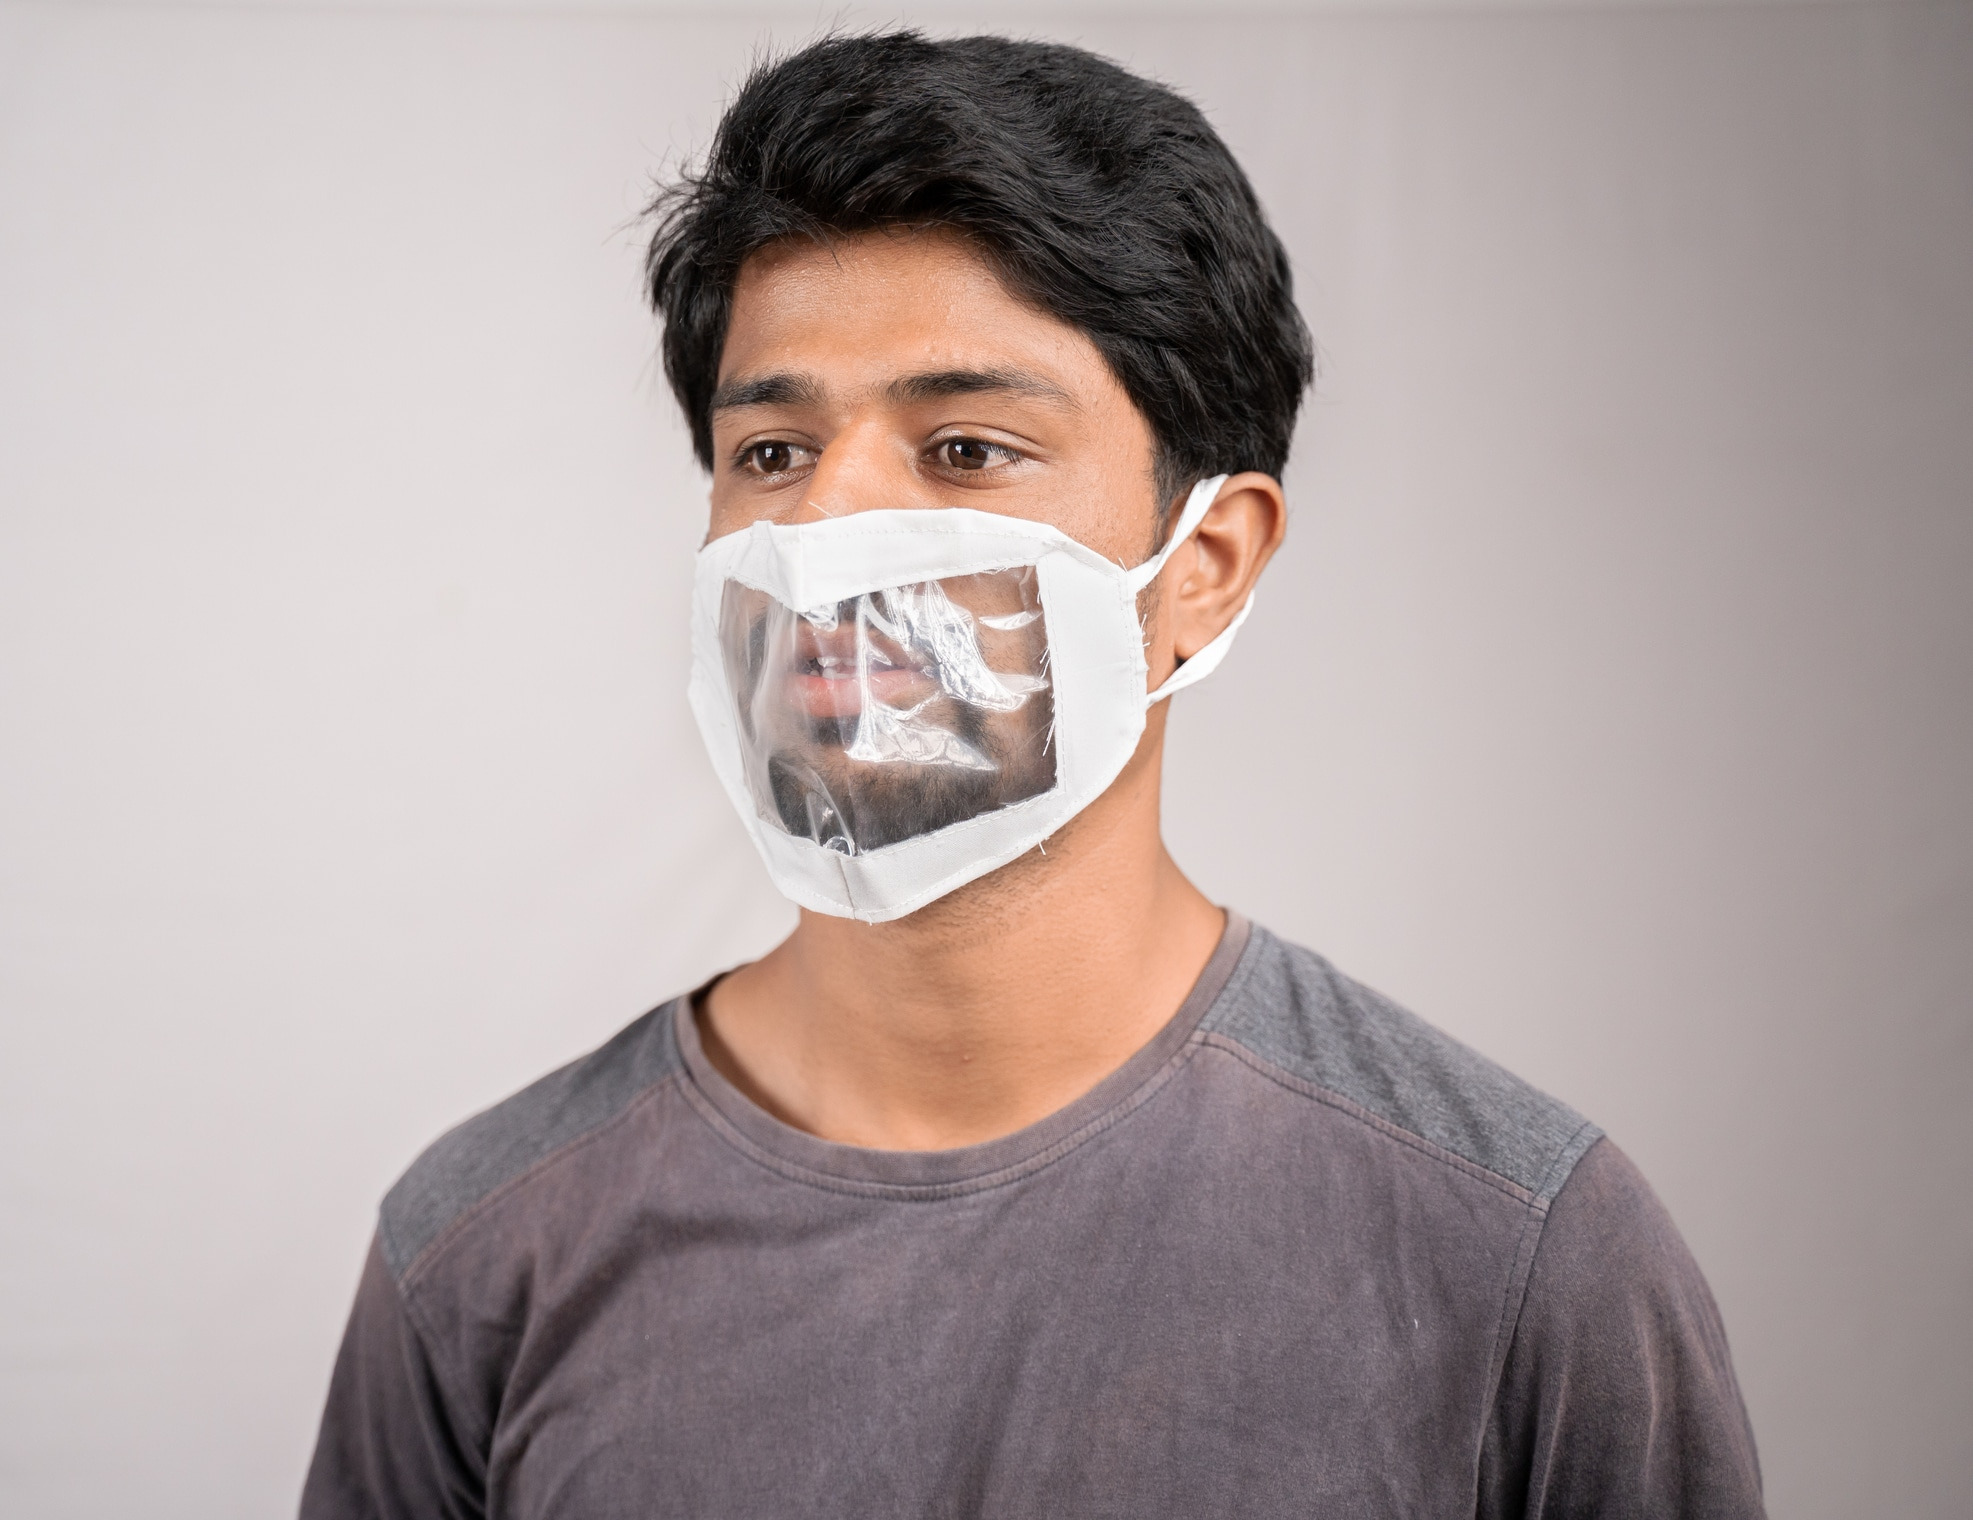

1/1 [==============================] - 0s 39ms/step
[[0.5251899  0.38773623]]
0
The Subject is Not Wearing a Mask


In [52]:
InputImagePath = input("Path of Image to be Predicted: ")
InputImage = cv2.imread(InputImagePath)
cv2_imshow(InputImage)
InputImageResized = cv2.resize(InputImage, (128, 128))
InputImageScaled = InputImageResized/255
InputImageReshaped = np.reshape(InputImageScaled, [1, 128, 128, 3])
InputPrediction = Model.predict(InputImageReshaped)

# The output is given in the format
# [[ (Probability that the subject is not weating a Mask)  (Probability that the subject is wearing a Mask) ]]
# np.argmax takes these values and return the max values out of the 2 and hence prediction is made
print(InputPrediction)

InputPredictionLabel = np.argmax(InputPrediction)
print(InputPredictionLabel)

if InputPredictionLabel == 1:
  print("The Subject is Wearing a Mask")
else:
  print("The Subject is Not Wearing a Mask")

Path of Image to be Predicted: /content/test3.jpg


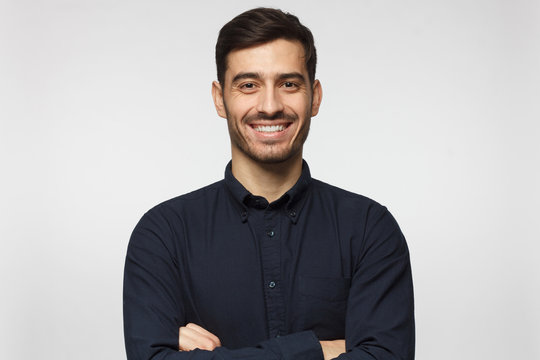

1/1 [==============================] - 0s 21ms/step
[[0.4122281  0.40536708]]
0
The Subject is Not Wearing a Mask


In [53]:
# Testing on a Second Image

InputImagePath = input("Path of Image to be Predicted: ")
InputImage = cv2.imread(InputImagePath)
cv2_imshow(InputImage)
InputImageResized = cv2.resize(InputImage, (128, 128))
InputImageScaled = InputImageResized/255
InputImageReshaped = np.reshape(InputImageScaled, [1, 128, 128, 3])
InputPrediction = Model.predict(InputImageReshaped)

# The output is given in the format
# [[ (Probability that the subject is not weating a Mask)  (Probability that the subject is wearing a Mask) ]]
# np.argmax takes these values and return the max values out of the 2 and hence prediction is made
print(InputPrediction)

InputPredictionLabel = np.argmax(InputPrediction)
print(InputPredictionLabel)

if InputPredictionLabel == 1:
  print("The Subject is Wearing a Mask")
else:
  print("The Subject is Not Wearing a Mask")